## What are the top 5 countries for each of the top 6 data roles?

In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


# Data Cleanup form a strings to list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Procedures:
1. Create a df_country_count by groupby the country and job title with it's count  

2. Sorted them with the values of count and obtain the Top 6 Data jobs (to a list)
3. Create a subplots (3X2) in barplots for each Top 6 Data jobs
4. Customize the x-labels for each barplots into 45 degrees
5. (Optional) The "bbox parameter" stands for bounding box, which lets you draw a styled box behind the text. It's just a dictionary of properties to control that box’s appearance.

In [ ]:
df_country_count = df.groupby(['job_country', 'job_title_short']).size()
df_country_count = df_country_count.reset_index(name='country_count')
df_country_count.sort_values(by='country_count',ascending=False, inplace=True)
df_country_count

,job_country,job_title_short,country_count
1316,United States,Data Analyst,67816
1318,United States,Data Scientist,58830
1317,United States,Data Engineer,35080
536,India,Data Engineer,19062
417,France,Data Analyst,13803
...,...,...,...
460,Guadeloupe,Software Engineer,1
772,Mauritania,Cloud Engineer,1
207,Cambodia,Senior Data Scientist,1
773,Mauritania,Data Scientist,1


In [ ]:
job_titles = df_country_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:6])
job_titles

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Senior Data Analyst',
 'Senior Data Engineer',
 'Senior Data Scientist']

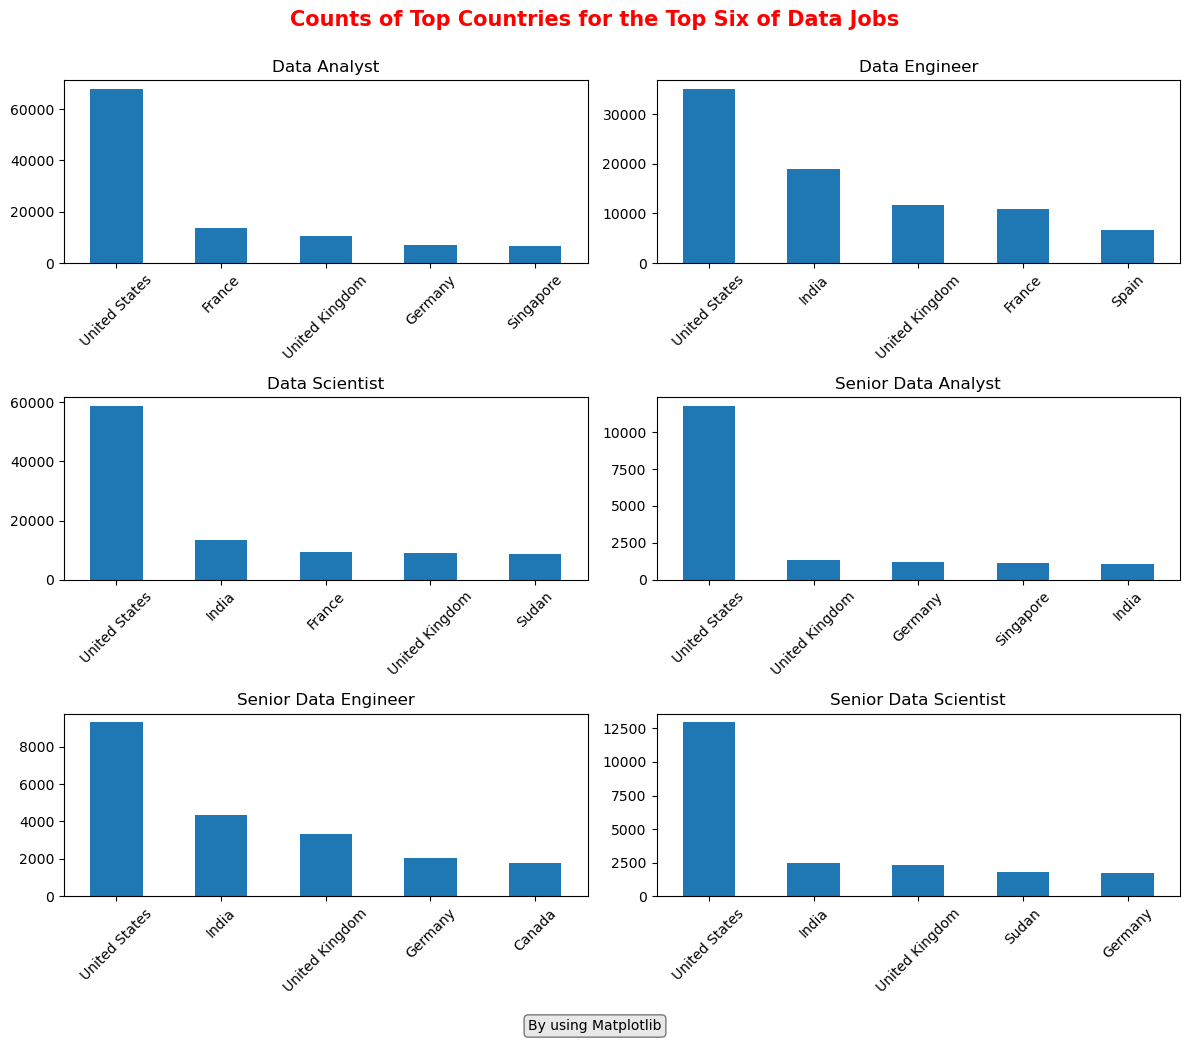

In [32]:
fig, ax = plt.subplots(3, 2, figsize=(12, 10))
ax = ax.flatten() 

for i, job_title in enumerate(job_titles):
    df_plot = df_country_count[df_country_count['job_title_short'] == job_title].head(5)  # only get the top five country for each job title
    df_plot.plot(kind='bar', x='job_country',y='country_count', ax=ax[i], title=job_title, legend=False)
    ax[i].tick_params(axis='x', labelrotation=45)
    ax[i].set_xlabel('')

fig.suptitle('Counts of Top Countries for the Top Six of Data Jobs', color ='red', fontsize = 15, fontweight='bold',y=1) #y=1 make the tile slightly upward
fig.tight_layout() # fix the overlap
fig.text(0.5, -0.02, 'By using Matplotlib', ha='center', fontsize=10, bbox=dict(facecolor='lightgrey', alpha=0.5, boxstyle='round'))

plt.show()

## Let Try to add percentage next to the bar

## Procedure:
1. Create a job total column to obtain the percentage later  

2. Merge dataframe for df_job_title_count and df_country_count
3. Create a skill_percent column by dividing the country count to the jobs total
4. Create a subplots (3X2) by using seaborn with barplots
5. Customize them by having each corresponded percentage next to each bar

In [ ]:
# Create a jobs total for us to obtain the percentage later
df_job_title_count = df['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,196075
1,Data Engineer,186241
2,Data Scientist,172286
3,Business Analyst,49063
4,Software Engineer,44929
5,Senior Data Engineer,44563
6,Senior Data Scientist,36957
7,Senior Data Analyst,29216
8,Machine Learning Engineer,14080
9,Cloud Engineer,12331


In [35]:
df_country_count

,job_country,job_title_short,country_count
1316,United States,Data Analyst,67816
1318,United States,Data Scientist,58830
1317,United States,Data Engineer,35080
536,India,Data Engineer,19062
417,France,Data Analyst,13803
...,...,...,...
460,Guadeloupe,Software Engineer,1
772,Mauritania,Cloud Engineer,1
207,Cambodia,Senior Data Scientist,1
773,Mauritania,Data Scientist,1


In [41]:
## Add a skill_percent column to the merge dataframe
df_skills_perc= pd.merge(df_country_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = 100 * df_skills_perc['country_count'] / df_skills_perc['jobs_total']
df_skills_perc

,job_country,job_title_short,country_count,jobs_total,skill_percent
0,United States,Data Analyst,67816,196075,34.586765
1,United States,Data Scientist,58830,172286,34.146710
2,United States,Data Engineer,35080,186241,18.835810
3,India,Data Engineer,19062,186241,10.235125
4,France,Data Analyst,13803,196075,7.039653
...,...,...,...,...,...
1382,Guadeloupe,Software Engineer,1,44929,0.002226
1383,Mauritania,Cloud Engineer,1,12331,0.008110
1384,Cambodia,Senior Data Scientist,1,36957,0.002706
1385,Mauritania,Data Scientist,1,172286,0.000580


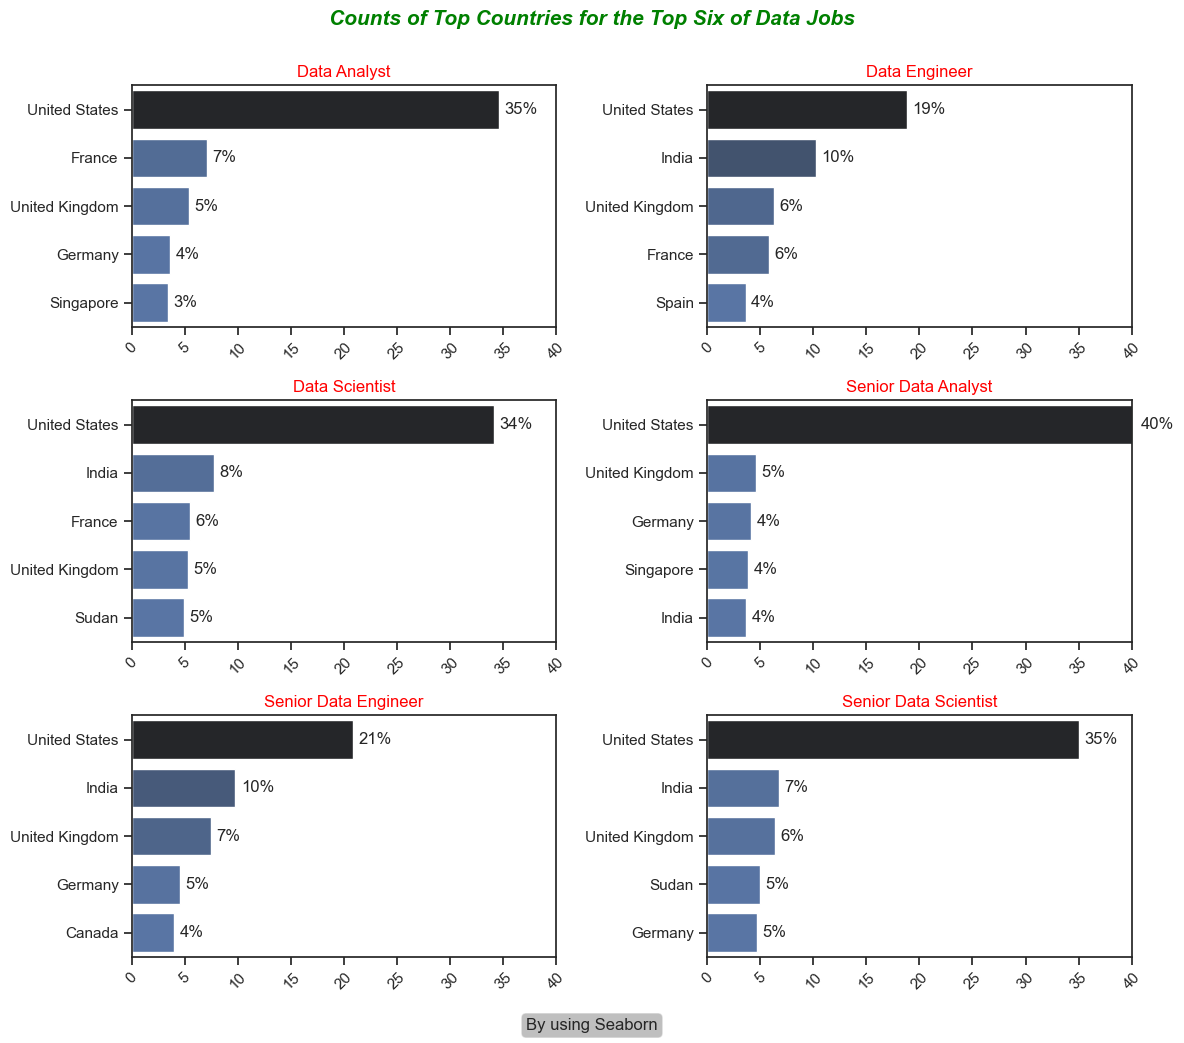

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(12, 10))
ax = ax.flatten() 

sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)  # only get the top five country for each job title
    sns.barplot(data=df_plot, x='skill_percent', y='job_country', ax=ax[i], hue='country_count', palette='dark:b_r', legend=False)
    ax[i].tick_params(axis='x', labelrotation=45)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 40)
    ax[i].set_title(job_title, color='red')
    
# Have each corresponded percentage next to each bar
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 0.5 , n, f'{v:.0f}%', va='center')  # v+0.5 means slightly away from the bar

fig.suptitle('Counts of Top Countries for the Top Six of Data Jobs', color ='green', fontsize = 15, fontweight='bold',fontstyle='italic', y=1) #y=1 make the tile slightly upward
fig.tight_layout() # fix the overlap
fig.text(0.5, -0.02, 'By using Seaborn', ha='center', fontsize=12, bbox=dict(facecolor='grey', alpha=0.5, boxstyle='round'))

plt.show()

# <span style="color:red; font-weight:bold">Insights</span>
The top hiring countries for six popular data job roles, offering insight into the global demand for data professionals.  
### United States: The Dominant Player
Across all six roles—Data Analyst, Data Engineer, Data Scientist, Senior Data Analyst, Senior Data Engineer, and Senior Data Scientist—the United States consistently holds the top position. This reflects the country’s mature tech industry, widespread data-driven business models, and a strong culture of analytics adoption.

### India: A Rapidly Growing Data Hub
India ranks second or third in several roles, especially in engineering and science positions. This trend aligns with India’s booming tech sector and its growing focus on data science education and outsourcing markets.  

### Western Europe’s Consistent Presence
The United Kingdom, France, and Germany frequently appear among the top five, highlighting Western Europe’s stable demand for data professionals. 

# <span style="color:red; font-weight:bold">Conclusion</span>
The visualization confirms the United States as the central hub for data jobs, with India and Western Europe following as major players. Senior and specialized roles are more concentrated, while entry-to-mid level roles like Data Analyst are more widespread. Emerging appearances from countries like Sudan may warrant further investigation, as they could indicate interesting developments in regional data ecosystems.  